<a href="https://colab.research.google.com/github/Sahil1101/Data_Analytics/blob/main/DA_Exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sahil Patil 

2019110042

BE ETRX

31/08/2022

Lab 1: Exploratory Data Analysis

Objective:

Perform EDA such as number of data samples, number of features, number of classes, number of data samples per class, removing missing values, conversion to numbers, using seaborn library to plot different graphs.



Theory: 

Prior to the use of any forecasting methods, we do load data analysis. Using various statistical estimates we extract the features of the data. The statistical features are mean, variance, correlation analysis, and auto-correlation analysis. Correlation analysis is done to find out the movement of one time series with another, eg. we estimate the correlation of load data and temperature data. In data analysis, we also detect the bad data entries or outliers and manage / replace them. Correlation study also helps in finding the best correlated day in the recent past for forecasting the load - we call them as reference days. These reference days capture the effect of economic factors, seasonality, and time factors. Along with the reference days, weather inputs are provided to the forecasting engine for deriving an output. Days are divided into normal days, holidays and special days (e.g.) categories.For each category, we have different models. Data provided by TPDDL has following parameters

Load (MW)
Temperature (OC)
Humidity (%

Code and Output:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('data.csv')

Snippet imports the necessary libraries for performing data analysis. Pandas is used to display the data frame and seaborn is used for plotting specifc graphs.

In [ ]:
df.info

<bound method DataFrame.info of        Sr_no         car_name     brand     model seller_type fuel_type  \
0          0      Maruti Alto    Maruti      Alto  Individual    Petrol   
1          1    Hyundai Grand   Hyundai     Grand  Individual    Petrol   
2          2      Hyundai i20   Hyundai       i20  Individual    Petrol   
3          3      Maruti Alto    Maruti      Alto  Individual    Petrol   
4          4    Ford Ecosport      Ford  Ecosport      Dealer    Diesel   
...      ...              ...       ...       ...         ...       ...   
15406  19537      Hyundai i10   Hyundai       i10      Dealer    Petrol   
15407  19540    Maruti Ertiga    Maruti    Ertiga      Dealer    Petrol   
15408  19541      Skoda Rapid     Skoda     Rapid      Dealer    Diesel   
15409  19542  Mahindra XUV500  Mahindra    XUV500      Dealer    Diesel   
15410  19543       Honda City     Honda      City      Dealer    Petrol   

      transmission_type  seats  km_driven  mileage  engine  max_pow

It gives a summary of the data type of each attribute in the dataset. This helps in determining which attributes can be used for numerical analysis.

In [ ]:
df.head()

,Sr_no,car_name,brand,model,seller_type,fuel_type,transmission_type,seats,km_driven,mileage,engine,max_power,selling_price,good_condition
0,0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual,5,120000,19.70,796,46.30,120000,yes
1,1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual,5,20000,18.90,1197,82.00,550000,yes
2,2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual,5,60000,17.00,1197,80.00,215000,no
3,3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual,5,37000,20.92,998,67.10,226000,yes
4,4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual,5,30000,22.77,1498,98.59,570000,no


The above snipppet is used to view the first view rows of the data set.

In [ ]:
df.tail()

,Sr_no,car_name,brand,model,seller_type,fuel_type,transmission_type,seats,km_driven,mileage,engine,max_power,selling_price,good_condition
15406,19537,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual,5,10723,19.81,1086,68.05,250000,yes
15407,19540,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual,7,18000,17.50,1373,91.10,925000,no
15408,19541,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual,5,67000,21.14,1498,103.52,425000,yes
15409,19542,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual,7,3800000,16.00,2179,140.00,1225000,yes
15410,19543,Honda City,Honda,City,Dealer,Petrol,Automatic,5,13000,18.00,1497,117.60,1200000,yes


The above snipppet is used to view the last view rows of the data set.

In [ ]:
df.shape

(15411, 14)

Total no. of rows and column

In [ ]:
df.describe()

,Sr_no,seats,km_driven,mileage,engine,max_power,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,5.325482,5.561648e+04,19.701151,1486.057751,100.588254,7.749711e+05
std,5643.418542,0.807628,5.161855e+04,4.171265,521.106696,42.972979,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,4.000000e+04
25%,4906.500000,5.000000,3.000000e+04,17.000000,1197.000000,74.000000,3.850000e+05
50%,9872.000000,5.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.560000e+05
75%,14668.500000,5.000000,7.000000e+04,22.700000,1582.000000,117.300000,8.250000e+05
max,19543.000000,9.000000,3.800000e+06,33.540000,6592.000000,626.000000,3.950000e+07


It describes the statitical parameters of each attribute in the dataset.

In [ ]:
df.columns

Index(['Sr_no', 'car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type', 'seats', 'km_driven', 'mileage', 'engine',
       'max_power', 'selling_price', 'good_condition'],
      dtype='object')

It gives an idea of all attributes used in the dataset

In [ ]:
df.nunique()

Sr_no                15411
car_name               121
brand                   32
model                  120
seller_type              3
fuel_type                5
transmission_type        2
seats                    8
km_driven             3688
mileage                411
engine                 110
max_power              342
selling_price         1086
good_condition           2
dtype: int64

The above function is used to get the unique values in each attribute.

In [ ]:
df.isnull().sum()

Sr_no                0
car_name             0
brand                0
model                0
seller_type          0
fuel_type            0
transmission_type    0
seats                0
km_driven            0
mileage              0
engine               0
max_power            0
selling_price        0
good_condition       0
dtype: int64

The above function is used to check if any null values are present in the dataset. If present, they can be removed and cleaned. But the exisisting dataset does not contain any null values.

In [ ]:
df.dropna()

,Sr_no,car_name,brand,model,seller_type,fuel_type,transmission_type,seats,km_driven,mileage,engine,max_power,selling_price,good_condition
0,0,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual,5,120000,19.70,796,46.30,120000,yes
1,1,Hyundai Grand,Hyundai,Grand,Individual,Petrol,Manual,5,20000,18.90,1197,82.00,550000,yes
2,2,Hyundai i20,Hyundai,i20,Individual,Petrol,Manual,5,60000,17.00,1197,80.00,215000,no
3,3,Maruti Alto,Maruti,Alto,Individual,Petrol,Manual,5,37000,20.92,998,67.10,226000,yes
4,4,Ford Ecosport,Ford,Ecosport,Dealer,Diesel,Manual,5,30000,22.77,1498,98.59,570000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,Dealer,Petrol,Manual,5,10723,19.81,1086,68.05,250000,yes
15407,19540,Maruti Ertiga,Maruti,Ertiga,Dealer,Petrol,Manual,7,18000,17.50,1373,91.10,925000,no
15408,19541,Skoda Rapid,Skoda,Rapid,Dealer,Diesel,Manual,5,67000,21.14,1498,103.52,425000,yes
15409,19542,Mahindra XUV500,Mahindra,XUV500,Dealer,Diesel,Manual,7,3800000,16.00,2179,140.00,1225000,yes


In [ ]:
df2=df.dropna()

The user to analyze and drop Rows/Columns with Null values in different ways.

In [ ]:
correlation=df2.corr()

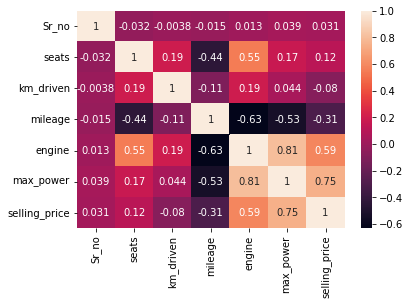

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

The above plot shows the correlation matrix of the dataset. The correlation values lie between -1 and 1 with 1 showing highest correlation or similarity whereas -1 shows inverse relation between the two attributes.

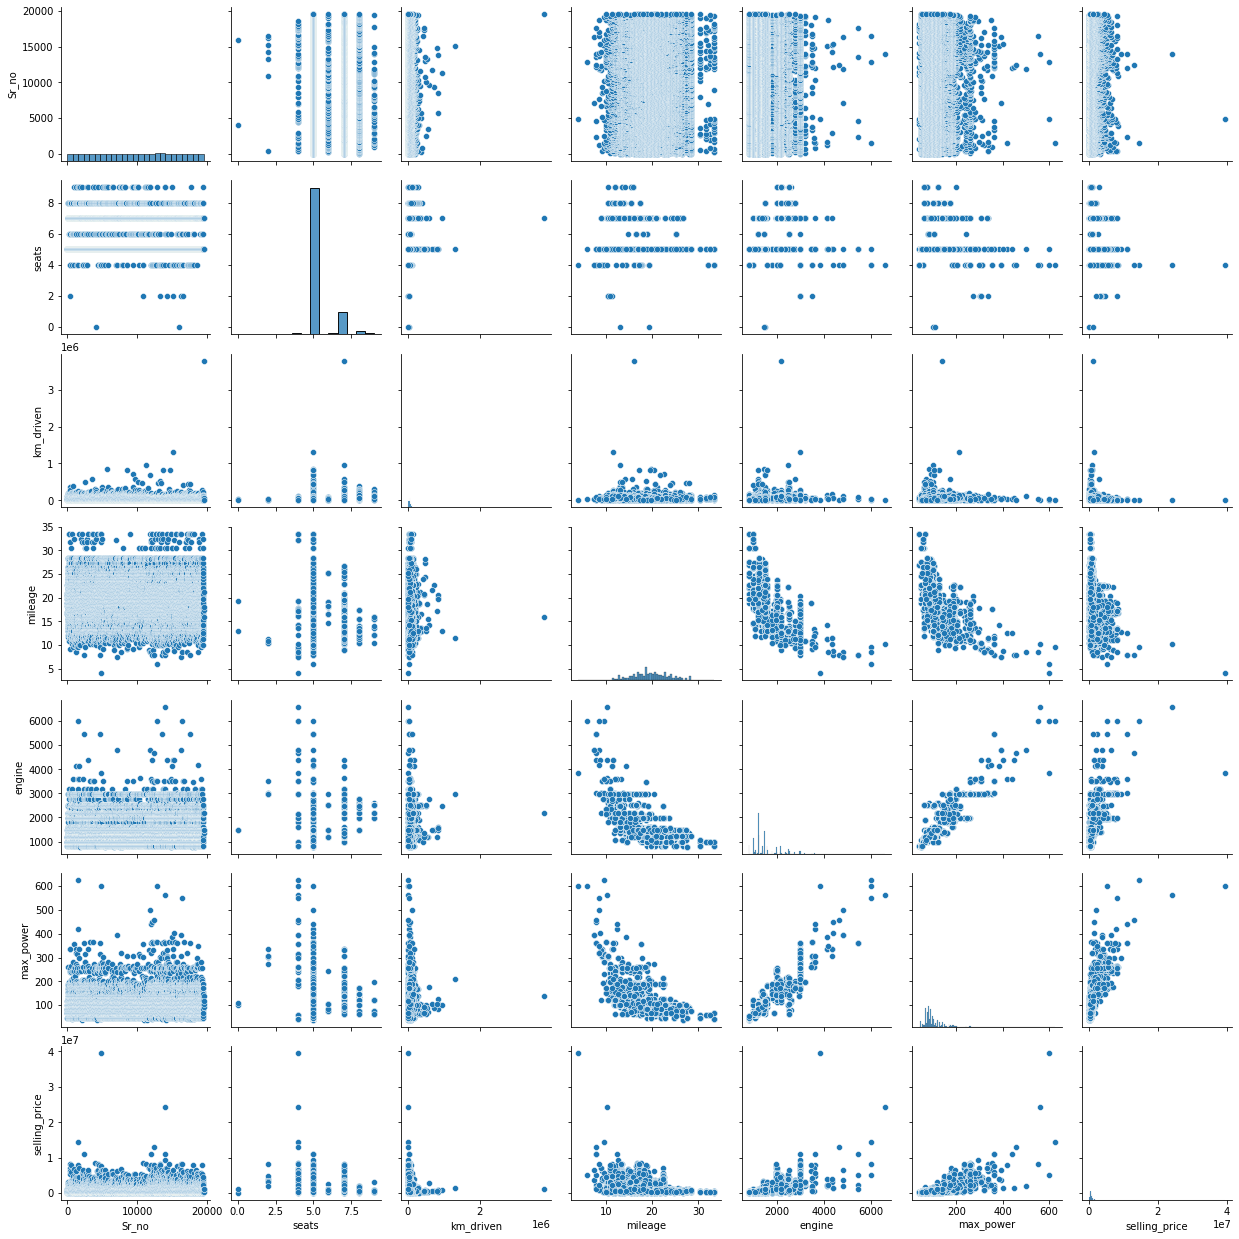

In [ ]:
sns.pairplot(df)

Seaborn Pairplot uses to get the relation between each and every variable present in Pandas DataFrame. It works like a seaborn scatter plot but it plot only two variables plot and sns paiplot plot the pairwise plot of multiple features/variable in a grid format.

(0.0, 300000.0)

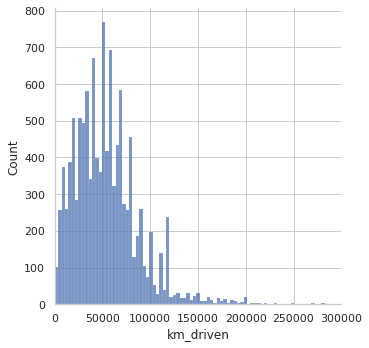

In [ ]:
sns.displot(df['km_driven'])
plt.xlim(0,300000)

sns.distplot() function allow keyword arguments (kws) to plot histogram beautiful way.

(0.0, 10000000.0)

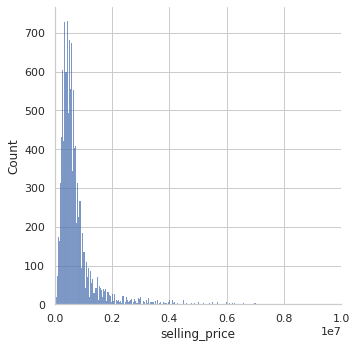

In [ ]:
sns.displot(df['selling_price'])
plt.xlim(0,10000000)

To plot one and multiple histograms with a real-time example using sns.distplot() function. Along with that used different function with different parameter and keyword arguments.

(0.0, 300000.0)

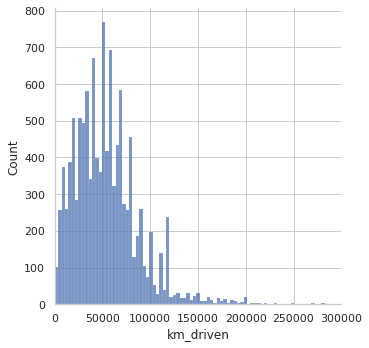

In [ ]:
import seaborn as sns
sns.displot(df['km_driven'])
plt.xlim(0,300000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 400000.0)

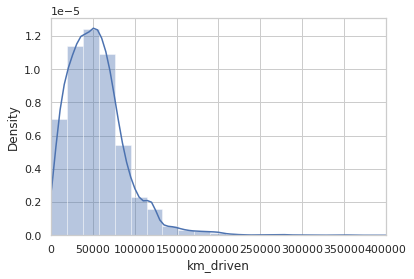

In [ ]:
import seaborn as sb
sb.set()
sb.set_style('whitegrid')
sb.distplot(df['km_driven'])
plt.xlim(0,400000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 10000000.0)

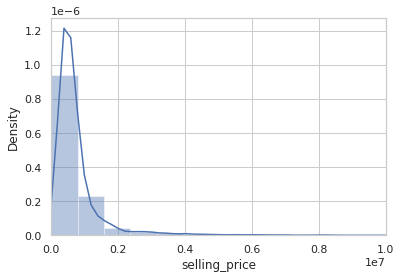

In [ ]:
sb.distplot(df['selling_price'])
plt.xlim(0,10000000)

Above Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.

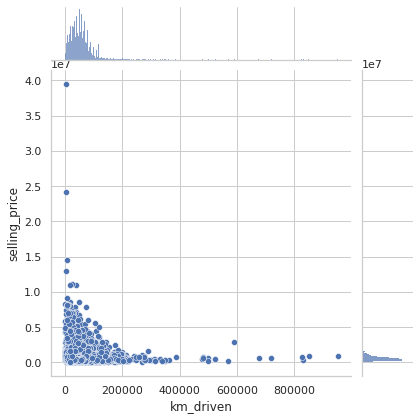

In [ ]:
sns.jointplot(x = df["km_driven"], y = df["selling_price"], kind = "scatter")

Above Plot Between Average Load and Average Humidity with scattering

Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use :class:’JointGrid’ directly.

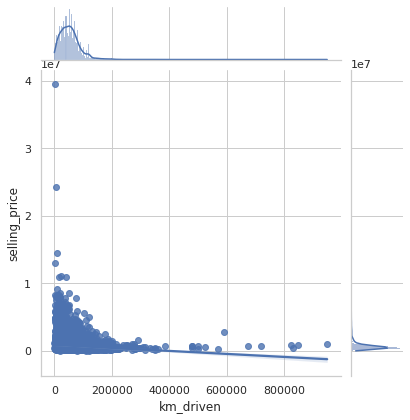

In [ ]:
sns.jointplot(x = df["km_driven"], y = df["selling_price"], kind = "reg")

Above Plot Between Average Load and Average Humidity with regression.bold text

Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use :class:’JointGrid’ directly.

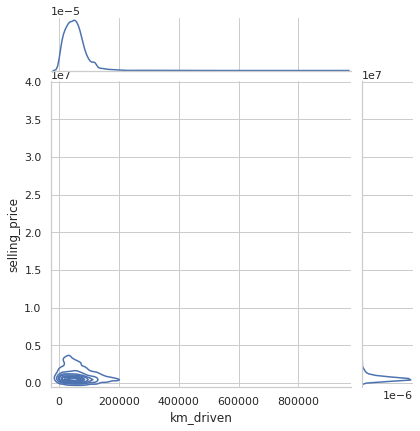

In [ ]:
sns.jointplot(x = df["km_driven"], y = df["selling_price"], kind = "kde")

Above Plot Between Average Load and Average Humidity with regression.bold text

Draw a plot of two variables with bivariate and univariate graphs. This function provides a convenient interface to the ‘JointGrid’ class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use :class:’JointGrid’ directly. will draw both bivariate and univariate KDEs

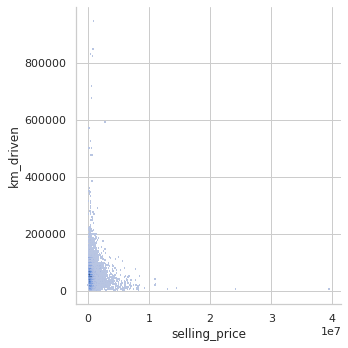

In [ ]:
import seaborn as sns
sns.displot(x=df['selling_price'],y=df['km_driven'])

In [ ]:
df.corr()

,Sr_no,seats,km_driven,mileage,engine,max_power,selling_price
Sr_no,1.000000,-0.034981,-0.027714,-0.006281,0.012238,0.043246,0.022286
seats,-0.034981,1.000000,0.239651,-0.452744,0.568183,0.176944,0.107463
km_driven,-0.027714,0.239651,1.000000,-0.126597,0.237399,0.046876,-0.100140
mileage,-0.006281,-0.452744,-0.126597,1.000000,-0.634672,-0.531983,-0.301285
engine,0.012238,0.568183,0.237399,-0.634672,1.000000,0.799168,0.570414
max_power,0.043246,0.176944,0.046876,-0.531983,0.799168,1.000000,0.746626
selling_price,0.022286,0.107463,-0.100140,-0.301285,0.570414,0.746626,1.000000


pearson: standard correlation coefficient

kendall: Kendall Tau correlation coefficient

spearman: Spearman rank correlation

min_periods : Minimum number of observations required per pair of columns to have a valid result. Currently only available for pearson and spearman correlation

Conclusion:

This report presented the comprehensive load data analysis. The correlation analysis of load vs load and

load vs temperature and load vs DI is presented. We have also discussed the data validation and list the anomalous days in the given data set. We have discussed and applied several methods for day ahead forecasting on the TPDDL data set.

Future Scope:

We emphasize to work on the following action items

Strengthen weather model for Delhi region.
Optimize the parameters for TPDDL data set.
Applying combination approach for TPDDL data set.
Sunday model will be improved further.